This Notebook tries to test the MatrixKernelApproximation code for different unequal grid spacing.
The grid spacing are not equal for all directions. For this we will use a Gaussian in 3D to generate the volume data.

In [1]:
using PyPlot, NPZ

In [2]:
fn = "MaternKernelApproximation.jl"
if homedir() == "/users/charlottehaley/"
    include(homedir()*"/Documents/Repos/laplaceinterpolation/"*fn)
else
    # This line only works if you've started the notebook in the laplaceinterpolation/Notebooks/ folder
    include("../"*fn)
end

Laplace3D_Grid

In [3]:
function f(x,y,z)
    return exp((-x^2-y^2-z^2)/4)
end

f (generic function with 1 method)

In [4]:
dx = 0.05
dy = 0.02
dz = 0.01
x = -1:dx:1
y = -1:dy:1
z = -1:dz:1
lenx = length(x)
leny = length(y)
lenz = length(z)
u = zeros(lenx, leny, lenz)
for i =1:lenx
    for j=1:leny
        for k=1:lenz
            u[i,j,k] = f(x[i],y[j], z[k])
        end
    end
end


In [5]:
radius = 0.3
@time reconstructed_u, punched_u = Matern3D_Grid(x, y, z, u, 0, radius, dx, dy, dz, 2)
@time reconstructed_L, punched_u = Laplace3D_Grid(x, y, z, u, radius, dx, dy, dz)

  9.449446 seconds (9.34 M allocations: 3.827 GiB, 6.68% gc time)
  2.446340 seconds (980.15 k allocations: 1.422 GiB, 6.89% gc time)


([0.6066531490908735, 0.605358036025198, 0.6024303679661441, 0.5970969176369785, 0.5878262986388852, 0.5712419226181951, 0.5366012561770334, 0.5457332367560046, 0.5543272847345071, 0.562353288144353  …  0.562353288144353, 0.5543272847345071, 0.5457332367560046, 0.5366012561770334, 0.5712419226181946, 0.5878262986388848, 0.5970969176369779, 0.6024303679661436, 0.6053580360251974, 0.6066531490908724], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5366012561770334, 0.5457332367560046, 0.5543272847345071, 0.562353288144353  …  0.562353288144353, 0.5543272847345071, 0.5457332367560046, 0.5366012561770334, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

In [6]:
#Save as NPY files for plotting in Python. See PlottingNotebook.ipynb

npzwrite("punched_u.npy", punched_u)
npzwrite("original_u.npy", u[:] )
npzwrite("reconstructed_u.npy", reconstructed_u)

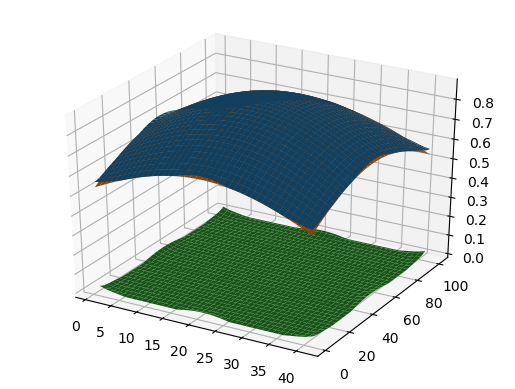

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7febf006af28>

In [7]:
punched_u = reshape(punched_u, lenx, leny, lenz)
reconstructed_u = reshape(reconstructed_u, lenx, leny, lenz)
reconstructed_L = reshape(reconstructed_L, lenx, leny, lenz)
l = 30
p1 = surf(reconstructed_u[:,:,l])
p2 = surf(u[:,:,l])
p3 = surf(reconstructed_u[:,:,l] - u[:,:,l])
#p4 = surf(punched_u[:,:,l])

In [8]:
norm(reconstructed_u[:,:,l] - u[:,:,l])

0.17713156018299622